# NCA5 Hydrogen Senky Diagram
Looking at data from Princeton Net-Zero America: https://netzeroamerica.princeton.edu/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.sankey import Sankey

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

GWh_per_PJ = 277.778
TJ_per_PJ = 1000

In [2]:
df20 = pd.read_csv('data/nzap-data-2050.csv')
print(len(df20.index))

6438


In [3]:
df20 = df20[ df20['scenario'] == 'E+RE+']
print(len(df20.index))

1075


In [4]:
df20

,filter_level_1,filter_level_2,filter_level_3,variable_name,unit,value,scenario,year,geo
5,MACRO RESULTS,Primary energy,NaN,Biomass,EJ,12.27907,E+RE+,2050,national
6,MACRO RESULTS,Primary energy,NaN,Coal and Coke,EJ,0.00074,E+RE+,2050,national
15,MACRO RESULTS,Primary energy,NaN,Geothermal,EJ,0.10748,E+RE+,2050,national
21,MACRO RESULTS,Primary energy,NaN,Hydro,EJ,1.06770,E+RE+,2050,national
27,MACRO RESULTS,Primary energy,NaN,Natural Gas,EJ,0.02198,E+RE+,2050,national
...,...,...,...,...,...,...,...,...,...
6408,IMPACTS,Health,Cumulative avoided premature deaths from air p...,Cumulative avoided premature deaths from air p...,avoided deaths,15307.23738,E+RE+,2050,national
6415,IMPACTS,Health,Cumulative avoided premature deaths from air p...,Cumulative avoided premature deaths from air p...,avoided deaths,2721.08958,E+RE+,2050,national
6420,IMPACTS,Health,Cumulative avoided premature deaths from air p...,Cumulative avoided premature deaths from air p...,avoided deaths,2242.57844,E+RE+,2050,national
6428,IMPACTS,Health,Cumulative avoided premature deaths from air p...,Cumulative avoided premature deaths from air p...,avoided deaths,1513.73756,E+RE+,2050,national




2050: E+RE+


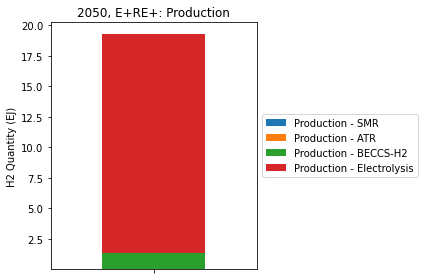

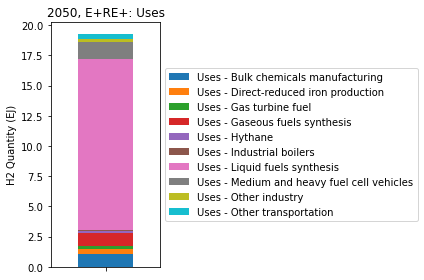



2050: E+RE-


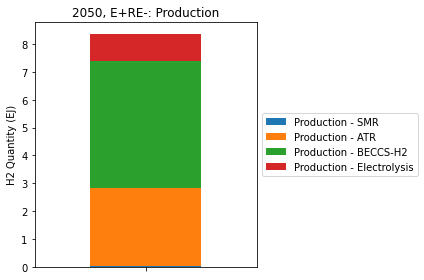

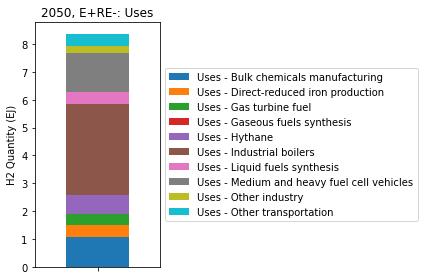

In [5]:
# Take Princeton's input csv file and prep table with all needed values for Senky diagram.
def prep_dt(year=2050, scenario='E+RE+'):
    
    # Read and get scenario
    print(f"\n\n{year}: {scenario}")
    df = pd.read_csv(f'data/nzap-data-{year}.csv')

    df = df[ df['scenario'] == scenario]
    
    
    
    # Make new df for skimmed values
    cols = df.columns
    dic = {col : [] for col in cols}
    df1 = pd.DataFrame(dic)
    
    
    
    # Skim all H2 related rows
    for idx in df.index:
        keep = False
        for col in cols:
            
            val = df.loc[idx, col]
            if type(val) == float or type(val) == np.float64 or type(val) == np.int64:
                continue
            
            if 'hydrogen' in val or 'Hydrogen' in val or 'H2' in val:
                keep = True
                break
        if keep:
            df1 = df1.append(df.loc[idx])
    
    df1.to_csv('tmp1.csv')
    
    
    
    # Reduce to H2 energy related rows
    df1 = df1[ df1['unit'].isin(['PJ', 'TJ', 'GWh']) ]
    df1.to_csv('tmp2.csv')
    #print(df1)
    
    
    
    # All values to GWh
    new_vals = []
    for idx in df1.index:
        val = df1.loc[idx, 'value']
        unit = df1.loc[idx, 'unit']
        if unit == 'GWh':
            new_vals.append(val)
        elif unit == 'PJ':
            new_vals.append(val * GWh_per_PJ)
        elif unit == 'TJ':
            new_vals.append(val / TJ_per_PJ * GWh_per_PJ)
        else:
            print(f"Unit was not considered in list, please fix this. Unit == {unit}")
            exit()
    df1['annual flow (GWh)'] = new_vals
    df1['annual flow (EJ)'] = df1['annual flow (GWh)'] / GWh_per_PJ / 1000.
    df1.to_csv('tmp3a.csv')
    #print(df1)

    
    
    # For comparison against PNZA's figures on slide 194 w/ production and use in EJ
    stacked_plot(year, scenario, df1, 'Production')
    stacked_plot(year, scenario, df1, 'Uses')
    
    
    
    #dT.plot.bar()
    # Prod
    #labs = ['production',]
    #axs[0].bar(labs)
  
    # ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
    #   label='Women')

    # Get conversion efficiencies and input energy
    
    # Create main table
    
    # Print summary outputs
    
    return


def stacked_plot(year, scenario, df, col):
    fig, ax = plt.subplots()
    plt.title(f"{year}, {scenario}: {col}")
    
    df1a = df[ df['filter_level_3'] == col ]
    df1a = df1a.set_index('variable_name')
    dT = df1a[['annual flow (EJ)',]].T
    dT.plot(kind='bar', stacked=True, ax=ax)

    
    #d.plot(kind='bar', ax=f.gca())
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    ax.set_ylabel('H2 Quantity (EJ)')
    ax.xaxis.set_ticklabels([])
    plt.tight_layout()
    plt.savefig(f"plots/{year}_{scenario}_{col}.png")
    plt.show()
    

prep_dt(2050, 'E+RE+')
prep_dt(2050, 'E+RE-')